In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

%matplotlib inline

## Создание датасета картинок из генератора

In [2]:
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)


In [3]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

In [4]:
images, labels = next(img_gen.flow_from_directory(flowers))

Found 3670 images belonging to 5 classes.


In [5]:
print(images.dtype, images.shape)
print(labels.dtype, labels.shape)


float32 (32, 256, 256, 3)
float32 (32, 5)


In [6]:
ds = tf.data.Dataset.from_generator(
    img_gen.flow_from_directory, args=[flowers], 
    output_types=(tf.float32, tf.float32), 
    output_shapes=([32,256,256,3], [32,5])
)


# Wrap the generator with tf.data
ds = tf.data.Dataset.from_generator(
    lambda: img_gen.flow_from_directory(flowers,
            target_size=(224, 224),
            shuffle=True),
    output_types=(tf.float32, tf.float32),
    output_shapes = ([None,224,224,3],[None,5])
).batch(5)

Found 3670 images belonging to 5 classes.


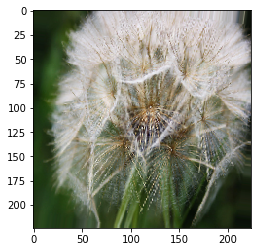

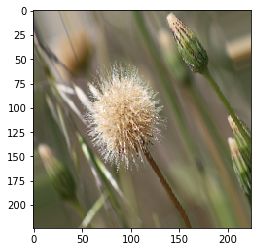

In [8]:
for image, _ in ds.take(2):
    plt.imshow(image[0,0,:])
    plt.show()    

## Создание фич из произвольного датасета из слайсов

In [56]:
data = tf.data.Dataset.from_tensor_slices([[1, 10.],[1, 20.],[0, 7.],[1, 22.]]).repeat(5).batch(3)

In [57]:
for f in data.take(3):
    print(f)

tf.Tensor(
[[ 1. 10.]
 [ 1. 20.]
 [ 0.  7.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[ 1. 22.]
 [ 1. 10.]
 [ 1. 20.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[ 0.  7.]
 [ 1. 22.]
 [ 1. 10.]], shape=(3, 2), dtype=float32)


In [65]:
# вполне можем и руками его засрезить !
def make_featured_dataset(x):
    return {'first':x[:,0], 'second':x[:,0] }
    

In [66]:
data_first_col = data.map(make_featured_dataset)

In [67]:
for i in data_first_col.take(30):
    print(i)

{'first': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 1., 0.], dtype=float32)>, 'second': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 1., 0.], dtype=float32)>}
{'first': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>, 'second': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>}
{'first': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 1.], dtype=float32)>, 'second': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 1., 1.], dtype=float32)>}
{'first': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 0., 1.], dtype=float32)>, 'second': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 0., 1.], dtype=float32)>}
{'first': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 1., 0.], dtype=float32)>, 'second': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 1., 0.], dtype=float32)>}
{'first': <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 1., 1.], dtype